<a href="https://colab.research.google.com/github/nvthong2303/machine-learning-project/blob/main/machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tải xuống dataset cho quá trình huấn luyện mô hình

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# tải dữ liệu từ api keras
(trainX, trainY), (testX, testY) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


xử lý dữ liệu vừa tải xuống

In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical

trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

định nghĩa model

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import keras
import tensorflow as tf 
from keras.layers import Dropout
from keras import backend as K
from keras.utils import np_utils

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(10, activation='softmax'))

	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.optimizers.Adam(),metrics=['accuracy'])
	return model

biểu diễn figure

In [105]:
from numpy import mean
from numpy import std

def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

đánh giá mô hình

In [102]:
from sklearn.model_selection import KFold

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)

        print('> %.3f' % (acc * 100.0))

        scores.append(acc)
        histories.append(history)
        # stores scores
        model.save('final_model.h5')
        
    return scores, histories
 
scores, histories = evaluate_model(trainX, trainY);

> 98.450
> 98.125
> 98.383
> 98.392
> 98.642


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


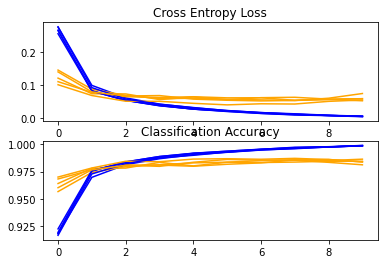

In [106]:
summarize_diagnostics(histories)

đánh giá mô hình bằng bộ test từ mnist

In [107]:
from tensorflow.keras.models import load_model

def run_test_harness():
	# load model
	model = load_model('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	
 
# entry point, run the test harness
run_test_harness()

> 98.620


đưa ra dự đoán với mô hình sau khi cải thiện

dự đoán 1 bức ảnh đầu vào :

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[[1.0454071e-06 9.5093864e-01 7.2695827e-03 3.4896271e-05 3.7025700e-06
  7.3857086e-07 3.0907110e-08 1.2381942e-02 2.9368408e-02 9.4688704e-07]]
1


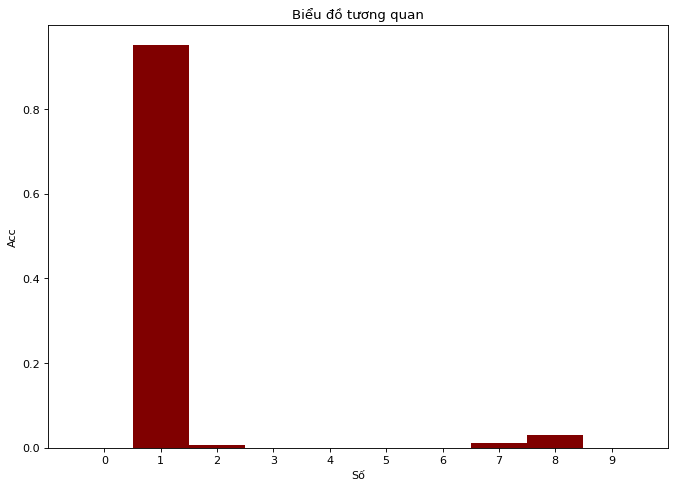

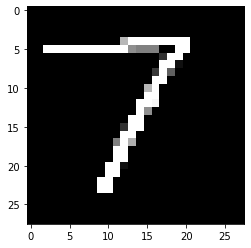

In [139]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from pandas import DataFrame
import numpy as np

imgname = 'number 7.png'


# load and prepare the image
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img
 
def run_example():
	img = load_image(imgname)
	model = load_model('final_model.h5')
	predict_value = model.predict(img)
	digit = argmax(predict_value)
 	
	# plt.imshow(img.reshape(28,28), cmap=plt.get_cmap('gray'))
	print(predict_value)
	print(digit)
	data = list(predict_value)
	newdata = np.squeeze(data)

	listnum = ['0','1', '2','3','4','5','6','7','8','9']
	fig = plt.figure(figsize = (10, 7), dpi=80)
	plt.bar(listnum, newdata, color ='maroon',width = 1)
	plt.xlabel("Số")
	plt.ylabel("Acc")
	plt.title("Biểu đồ tương quan")
	plt.show()

def show_image():
	img = load_image(imgname)
	plt.imshow(img.reshape(28,28), cmap=plt.get_cmap('gray'))
 
run_example()
show_image()

cải thiện model

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import keras
import tensorflow as tf 
from keras.layers import Dropout
from keras import backend as K
from keras.utils import np_utils

input_shape = (28, 28, 1)
batch_size = 128
num_classes = 10
epochs = 10

def define_model_new():
	model = Sequential()
	model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dropout(0.3))
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
 
	model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.optimizers.Adam(),metrics=['accuracy'])
	return model

đánh giá mô hình với model mới

In [116]:
from sklearn.model_selection import KFold

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model_new()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)

        print('> %.3f' % (acc * 100.0))

        scores.append(acc)
        histories.append(history)
        # stores scores
        model.save('final_model_new.h5')
        
    return scores, histories
 
scores, histories = evaluate_model(trainX, trainY);

> 99.183
> 99.150
> 98.775
> 99.242
> 99.042


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


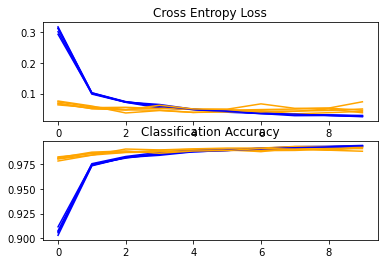

In [118]:
summarize_diagnostics(histories)

đánh giá mô hình mới bằng bộ test từ mnist

In [120]:
from tensorflow.keras.models import load_model

def run_test_harness():
	# load model
	model = load_model('final_model_new.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	
 
# entry point, run the test harness
run_test_harness()

> 99.230


đưa ra dự đoán với mô hình sau khi cải thiện

dự đoán 1 bức ảnh đầu vào :

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[[5.5914279e-10 3.1531465e-03 8.5709698e-04 1.8599633e-07 1.4326252e-05
  2.4900528e-09 6.1808181e-10 9.9596715e-01 3.3747713e-07 7.6200590e-06]]
7


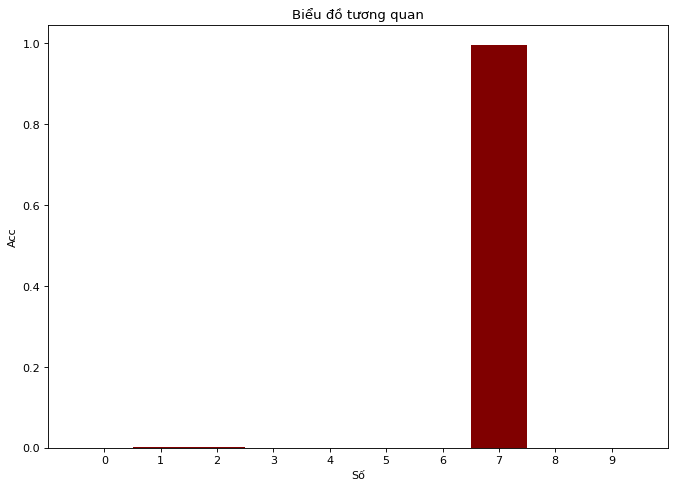

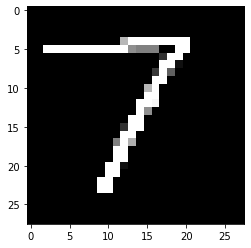

In [140]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from pandas import DataFrame
import numpy as np

imgname = 'number 7.png'


# load and prepare the image
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img
 
def run_example():
	img = load_image(imgname)
	model = load_model('final_model_new.h5')
	predict_value = model.predict(img)
	digit = argmax(predict_value)
 	
	# plt.imshow(img.reshape(28,28), cmap=plt.get_cmap('gray'))
	print(predict_value)
	print(digit)
	data = list(predict_value)
	newdata = np.squeeze(data)

	listnum = ['0','1', '2','3','4','5','6','7','8','9']
	fig = plt.figure(figsize = (10, 7), dpi=80)
	plt.bar(listnum, newdata, color ='maroon',width = 1)
	plt.xlabel("Số")
	plt.ylabel("Acc")
	plt.title("Biểu đồ tương quan")
	plt.show()

def show_image():
	img = load_image(imgname)
	plt.imshow(img.reshape(28,28), cmap=plt.get_cmap('gray'))
 
run_example()
show_image()